# Marketa Analytics - E-Commerce data

# Content
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 
for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 
Many customers of the company are wholesalers.


# This dataframe contains 8 variables that correspond to:
<b>InvoiceNo:</b> Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

<b>StockCode:</b> Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

<b>Description:</b> Product (item) name. Nominal.

<b>Quantity:</b> The quantities of each product (item) per transaction. Numeric.

<b>InvoiceDate:</b> Invice Date and time. Numeric, the day and time when each transaction was generated.

<b>UnitPrice:</b> Unit price. Numeric, Product price per unit in sterling.

<b>CustomerID:</b> Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

<b>Country:</b> Country name. Nominal, the name of the country where each customer resides.

# Importing and Data Cleaning

In [1]:
#importing all important package..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data into pandas dataframe..
df = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Assignment 1/data.csv',encoding = "ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#information of dataset..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [179]:
df.Country.value_counts().head(5)

df = df[df.Country == 'United Kingdom']

In [7]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [182]:
#Quantity can not be negative so remove negative values..
df = df[df['Quantity']>0]
df.Quantity.describe()

count    354321.000000
mean         12.013795
std         189.267956
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [10]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

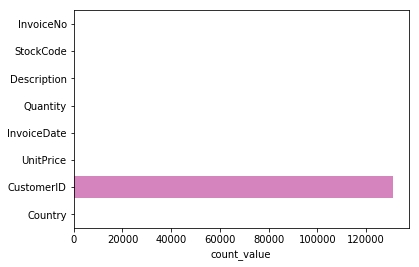

In [11]:
#checking null values in all columns in dataset
null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(null_values.count_value,null_values.index)

# Removing Missing Value

In [12]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
#last date available in our dataset
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [15]:
#use latest date in our data as current date..

import datetime as dt
now = dt.date(2011,12,9)

In [88]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date
df['month'] = pd.DatetimeIndex(df.InvoiceDate).month_name(locale = 'English')
df['year'] = pd.DatetimeIndex(df.InvoiceDate).year

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


# RFM Analysis

In [19]:
#group by customer by last date they purchased...

recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [20]:
#calculate how often he is purchasing with reference to latest date in days..

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [22]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [23]:
#check frequency of customer means how many transaction has been done..

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


In [24]:
#calculate how much a customer spend in the each transaction...

df['Total_cost'] = df['UnitPrice'] * df['Quantity']

In [25]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'Total_cost'],
      dtype='object')

In [26]:
#check summed up spend of a customer with respect to latest date..

monetary_df=df.groupby(['CustomerID'],as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [27]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [28]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..

#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

#rfm.set_index('CustomerID',inplace=True)

In [29]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,0,209,33719.73
3,12749.0,3,5,4090.88
4,12820.0,3,4,942.34


In [31]:
#checking correctness of output..

df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,77183.6


In [32]:
(now - dt.date(2011,1,18)).days == 325

True

In [33]:
#bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

# Customer Segmentation using RFM Analysis

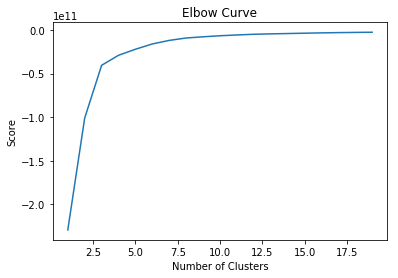

In [34]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [36]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [185]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,CustomerID,Recency,Frequency,Monetary,cluster,Status
1,12747.0,2,11,4196.01,0,Silver
3,12749.0,3,5,4090.88,0,Silver
4,12820.0,3,4,942.34,0,Silver
5,12821.0,214,1,92.72,0,Silver
6,12822.0,70,2,948.88,0,Silver
7,12823.0,74,5,1759.50,0,Silver
8,12824.0,59,1,397.12,0,Silver
9,12826.0,2,7,1474.72,0,Silver
10,12827.0,5,3,430.15,0,Silver
11,12828.0,2,6,1018.71,0,Silver


In [38]:
rfm_segmentation[rfm_segmentation.cluster == 1].head(5)

,CustomerID,Recency,Frequency,Monetary,cluster
2598,16446.0,0,2,168472.50,1
3314,17450.0,8,46,194550.79,1
3783,18102.0,0,60,259657.30,1


In [39]:
rfm_segmentation[rfm_segmentation.cluster == 2].head(10)

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,325,1,77183.60,2
2,12748.0,0,209,33719.73,2
82,12931.0,21,15,42055.96,2
187,13081.0,11,11,28337.38,2
191,13089.0,2,97,58825.83,2
199,13098.0,1,28,28882.44,2
424,13408.0,1,62,28117.04,2
620,13694.0,3,50,65039.62,2
682,13777.0,0,33,25977.16,2
693,13798.0,1,57,37153.85,2


In [40]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,325,1,77183.60,2
1,12747.0,2,11,4196.01,0
2,12748.0,0,209,33719.73,2
3,12749.0,3,5,4090.88,0
4,12820.0,3,4,942.34,0


In [41]:
rfm_segmentation = rfm_segmentation.reset_index(drop = 1)

In [42]:
rfm_segmentation['Status'] = 0
for i in range(0,len(rfm_segmentation)):
    if(rfm_segmentation['cluster'][i] == 0):
        rfm_segmentation['Status'][i] = "Silver"
    elif(rfm_segmentation['cluster'][i] == 1):
        rfm_segmentation['Status'][i]= "Gold"
    else:
        rfm_segmentation['Status'][i] ="Platinum"

In [186]:
rfm_segmentation.head(10)

,CustomerID,Recency,Frequency,Monetary,cluster,Status
0,12346.0,325,1,77183.60,2,Platinum
1,12747.0,2,11,4196.01,0,Silver
2,12748.0,0,209,33719.73,2,Platinum
3,12749.0,3,5,4090.88,0,Silver
4,12820.0,3,4,942.34,0,Silver
5,12821.0,214,1,92.72,0,Silver
6,12822.0,70,2,948.88,0,Silver
7,12823.0,74,5,1759.50,0,Silver
8,12824.0,59,1,397.12,0,Silver
9,12826.0,2,7,1474.72,0,Silver


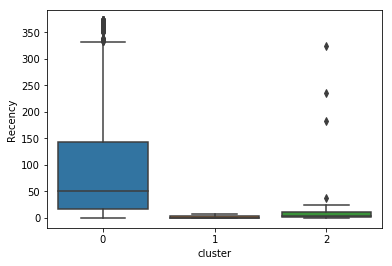

In [44]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

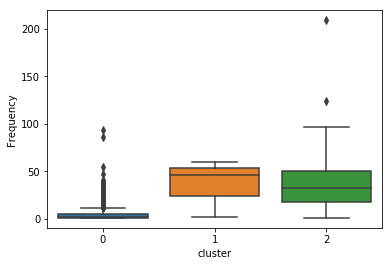

In [45]:
'''
cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in 
race of platinum and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

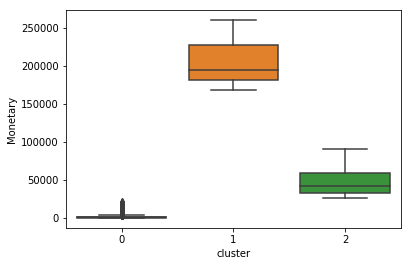

In [46]:
'''
cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as 
cluster 2 have medium level(Gold) and cluster 0 is silver customer.
'''

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

In [47]:
seg_data = df.merge(rfm_segmentation,left_on='CustomerID',right_on='CustomerID')

In [48]:
seg_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'Total_cost', 'Recency',
       'Frequency', 'Monetary', 'cluster', 'Status'],
      dtype='object')

In [193]:
seg_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost,cluster,Status,discount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0,Silver,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0,Silver,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0,Silver,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0,Silver,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0,Silver,1


# Creating Discounts

In [94]:
grouped = seg_data[['Description','UnitPrice']].groupby(['Description'])
seg_data['discount'] = 0
for i in range(0,len(seg_data)):
    if(i%50000 == 0):
        print(i)
    des = seg_data['Description'][i]
    if seg_data['UnitPrice'][i] < grouped.get_group(des).max()[1]:
        seg_data['discount'][i] = 1

0
50000
100000
150000
200000
250000
300000
350000


In [54]:
platinum = seg_data[seg_data['Status'] == 'Platinum']
gold = seg_data[seg_data['Status'] == 'Gold']
silver = seg_data[seg_data['Status'] == 'Silver']

In [55]:
print(platinum.shape,gold.shape,silver.shape)

(30590, 12) (771, 12) (322960, 12)


In [97]:
seg_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost,cluster,Status,discount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30,0,Silver,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0,Silver,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00,0,Silver,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0,Silver,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34,0,Silver,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01,15.30,0,Silver,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01,25.50,0,Silver,1
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01,11.10,0,Silver,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01,11.10,0,Silver,1
9,536372,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 9:01,1.85,17850.0,United Kingdom,2010-12-01,11.10,0,Silver,1


# Product Segmentation

In [64]:
import pickle
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

In [195]:
X = seg_data1["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (2895, 1476) of float64


In [196]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (2895, 100) of float64


In [197]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

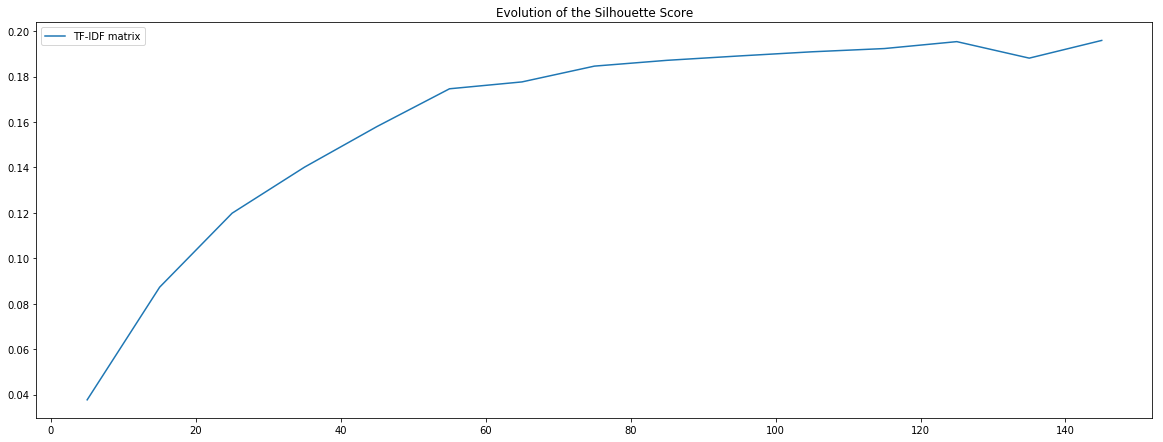

In [198]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

The highest value for the silhouette score is when there are 135 clusters. So we'll chose this value.

Text(0.5,1,'ACP with 135 clusters')

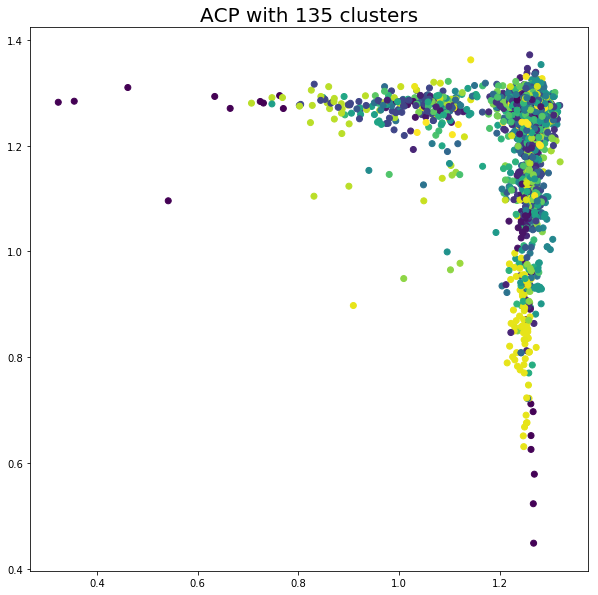

In [199]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

In [200]:
X = list(X)
clusters = list(clusters)

In [201]:
prod_seg = pd.DataFrame(list(zip(X, clusters)), 
               columns =['Description', 'prod_cluster']) 

In [93]:
prod_seg.to_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Assignment 1/prod_seg.csv')

In [101]:
Y = [0,1,2,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
     41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,
     78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,
     111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134]

cluster_name = ['STATIONARY',' PURSE','ZINC','SETS','VINTAGE','BOXES',' METAL',' BEADS','CUISHON',' ROSE',' BAG',
                ' HEART',' EGG',' FRAME',' RETROSPOT',' DECORATION',' GARDEN',' HOME',' CAKE',' NECKLACE',' ART',
                ' EASTER',' CANDEL',' LOLA',' LIST',' SILVER',' DOOR',' CARD',' PACK',' RIBBON',' PENCIL',' POLKADOT',
                ' BRACELET',' PAPER',' FLOWER',' HOLDER',' WRAP',' TILE',' TRAY',' MINI',' BUTTERFLY',' STAND',' JAR',
                ' BLACK',' DRAWER',' HEART',' TEA',' HOUSEHOLD',' FELT',' LUGGAGE',' DOLLY',' WITH',' T LIGHT',' PAISLEY',
                ' VINTAGE',' HANGING',' BIRD',' STAR',' IN',' BOX',' IVORY',' KEY RING',' STICKER',' CERAMIC, STRAWBERRY',
                ' EARRING',' BAG',' CHOCOLATE MOULD',' HOOK, PANTRY',' KIT',' WHITE',' BOWL',' WOODEN',' HEART',' NOTEBOOK',
                ' SET',' MUG',' MIRROR',' BLUE',' BIN, BASKET, TUMBLER',' POT',' HOLDER',' MAGIC',' SKULL',' SPACEBOY',
                ' CLOCK',' SET',' GARLAND',' BIRD',' SET',' BELL',' SMALL',' CHRISTMAS',' DESIGN',' GLASS',' SPOT',' BOX',
                ' FELTCRAFT',' BRACELET',' VINTAGE BAG',' TIN',' TOY',' SWEETHEART',' ASSORTED',' TRADITIONAL',' ZINC',
                ' PARTY',' CHRISTMAS',' BOWL',' WOOD',' GREEEN',' PAPER',' LIGHT',' LARGE',' MUG',' PURPLE',' ENAMEL',
                ' JUMBO BAG',' RED',' DOORMAT',' LOVE',' CREAM',' PINK',' GOLD',' APRON',' POLYESTER',' BAG',' ACRYLIC',
                ' CHARM',' SET',' INCENSE',' NAPKIN',' FLOWER',' BOTTLE']

In [109]:
prod_seg_name = pd.DataFrame(list(zip(Y, cluster_name)), 
               columns =['prod_cluster', 'Cluster']) 

In [115]:
prod_seg_name.head()

,prod_cluster,Cluster
0,0,STATIONARY
1,1,PURSE
2,2,ZINC
3,3,SETS
4,5,VINTAGE


In [72]:
seg_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'Total_cost', 'cluster',
       'Status'],
      dtype='object')

In [202]:
merge_1_1 = seg_data1.merge(prod_seg,left_on='Description',right_on='Description')
merge_2_2 = merge_1.merge(prod_seg_name, left_on = 'prod_cluster',right_on='prod_cluster')

In [120]:
merge_2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'Total_cost', 'cluster',
       'Status', 'discount', 'prod_cluster', 'Cluster'],
      dtype='object')

In [203]:
final_data_nonuk = merge_2[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'Total_cost','Status', 'discount','Cluster']]

In [122]:
final_data['month'] = pd.DatetimeIndex(final_data.InvoiceDate).month_name(locale = 'English')
final_data['year'] = pd.DatetimeIndex(final_data.InvoiceDate).year

In [205]:
final_data_nonuk.to_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Assignment 1/final_data_nonuk.csv')

In [125]:
platinum = final_data[final_data['Status'] == 'Platinum']
gold = final_data[final_data['Status'] == 'Gold']
silver = final_data[final_data['Status'] == 'Silver']